<a href="https://colab.research.google.com/github/fisherj1/RL-operator/blob/main/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D1%8B%D0%B9_%D0%BE%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%B8%D0%BD%D1%82%D0%B3%D0%B5%D1%80%D0%B8%D1%80%D1%83%D1%8E%D1%89%D0%B5%D0%B9_RL_%D1%86%D0%B5%D0%BF%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание по курсу "Теория линейных ИВС"
#### Выполнил: Чернов К. Н., 435 группа.


## Задание №2, оператор №2.

## Постановка задачи:
Реализовать программно действие псевдообратного оператора $𝐴^-$, воспользовавшись тем, что
$$
A^-y = \lim_{w\to +0}\operatorname*{argmin}_x \: \Big(\| Ax-y \|^2 + \omega \|x\|^2\Big),
$$
где A - оператор интегрирующей RL-цепи.

## Интегирующая RL-цепь:
Определим как "идеально интегрирующую" цепочку, выходной сигнал которой есть интеграл от входного. Это означает выполнение условия:

\begin{equation}
U_{out}(t) = b\int_{-\infty}^t U_{in}(\tau)d\tau,
\end{equation}
где  $U_{in}(t)$,  $U_{out}(t)$ - входной и выходной сигналы. Для такой цепи коэффициент передачи должен иметь вид:
\begin{equation}
K_{int}(\omega) = \frac{b}{i\omega}.
\end{equation}


Коэффицент передачи для RL-цепи, изображенной на рисунке 1 имеет вид:
\begin{equation}
K_{RL}(\omega) = \frac{1}{1+i\omega\tau^*}, \;   
\tau^* = \frac{L}{R}.
\end{equation}

Поэтому можно сформулировать условие интегрируемости: данная цепочка будет приближенно интегиррующей при выполнении условия:
\begin{equation}
\omega\tau^* \gg 1 \Rightarrow K_{RL}(\omega) \approx \frac{1}{i\omega\tau^*}.
\end{equation}

Приближенное услвоие интегирруемости на временном языке будет означать то, что харктерное время $t_0$ сигнала должно удволетворять условию $\tau^* \gg t_0$ .

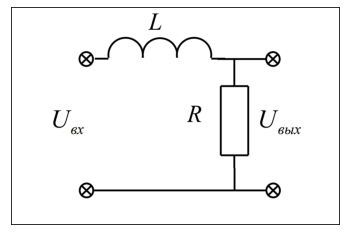

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
plt.xticks([])
plt.yticks([])
plt.imshow(Image.open('integ.png'))
plt.show()

## Линейный оператор интегрирующей RL-цепи.

Для реализации линейного опреатора интегрирующей RL-цепи

\begin{equation}
U_{out}(t) = A \: U_{in}(t) =\frac{1}{\tau^*}\int_{0}^t U_{in}(\tau) d \tau ,
\end{equation}
воспользуемся численным методом интегрирования.


Пусть входной сигнал $U_{in}(t)$ задан на отрезке $[0, T]$. Разобъем этот отрезок на одинаковые части длиной $h$. При этом получим равномерную сетку из $N+1$ узлов:
\begin{equation}
\Delta x_0 = [x_0,\:x_1], ..., \Delta x_{N-1} = [x_{N-1},\: x_N]; \; x_0 = 0; \; x_i-x_{i-1} = h, \;i = 1, ..., N; \; x_N = T.
\end{equation}

На каждом отрезке сетки выберем серединные точки:
\begin{equation}
\xi_i = x_i +\frac{h}{2}, \; i = 0, ..., N-1.
\end{equation}

Тогда приближенное значение интеграла в точке $\xi_n$ записывается следующим образом:
\begin{equation}
U_{out}(\xi_n) =A\:U_{in}(t) = \frac{1}{\tau^*} \sum_{i=0}^n U_{in}(\xi_i)\cdot (x_i-x_{i-1}). 
\end{equation}

Зафиксируем $N$, $T$, $h = \frac{T}{N}$. Тогда значения функции $U_{in}$ в точках $\xi_i$ зафиксированной сетки можно представить в виде столбца высотой N. Введем евклидово пространство столбцов высоты N с скалярным произведением:
$$
(x, \;y) = \sum_{i=1}^N x_i \cdot y_i
$$
Матрица приближенного интегрирующего оператора в этом пространтсве будет выглядить следующим образом:
$$
\widetilde{A} = 
\begin{pmatrix}
  h& 0&  ...& 0\\
  h&h&...&0\\
 \vdots &\vdots& &\vdots\\
 h&h&...&h\\
\end{pmatrix}
$$

Поэтому операцию интегрирования можно представить как
\begin{equation}
\begin{pmatrix}
  U_{out}(\xi_1)\\
  U_{out}(\xi_2)\\
 \vdots\\
 U_{out}(\xi_N)\\
\end{pmatrix}
=
\begin{pmatrix}
  h& 0&  ...& 0\\
  h&h&...&0\\
 \vdots &\vdots& &\vdots\\
 h&h&...&h\\
\end{pmatrix}
\begin{pmatrix}
  U_{in}(\xi_1)\\
  U_{in}(\xi_2)\\
 \vdots\\
 U_{in}(\xi_N)\\
\end{pmatrix}
\end{equation}


## Реализация оператора интегрирующей RL-цепи.

В дальнейшем выбрем отрезок $[0, 2\pi]$ в качестве области задания входного сигнала. Пусть $N=100, \; h = \frac{2\pi}{N}, \: \tau^* = 1000 \gg 2\pi$.
Реализуем оператор интегрирующей RL-цепи и проверим корректность ее работы.

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 100
a = 0
b = 2*np.pi
h = b/N
tau = 1000
x_s = torch.linspace(start=a+h/2, end=b, steps=N, requires_grad=False)

In [4]:
def create_matrix(N, delta=1):
  A = torch.zeros([N,N], requires_grad=False)
  for i in range(N-1, -1, -1):
    for j in range(0, i+1):
      A[i, j] = delta
  return A/tau
A =  create_matrix(N, delta=h)
A.numpy().round(5)

array([[6.e-05, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [6.e-05, 6.e-05, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [6.e-05, 6.e-05, 6.e-05, ..., 0.e+00, 0.e+00, 0.e+00],
       ...,
       [6.e-05, 6.e-05, 6.e-05, ..., 6.e-05, 0.e+00, 0.e+00],
       [6.e-05, 6.e-05, 6.e-05, ..., 6.e-05, 6.e-05, 0.e+00],
       [6.e-05, 6.e-05, 6.e-05, ..., 6.e-05, 6.e-05, 6.e-05]],
      dtype=float32)

Пусть $U_{in}(t) = sin(t), \; t \in [0, 2\pi] $. Тогда $U_{out}(t) =  \frac{1}{\tau^*}\int_{0}^t sin\tau d\tau = \frac{1 - cos(t)}{\tau^*}.$
Проверим, корректность работы реализованного оператора.

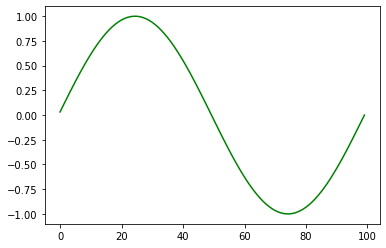

In [5]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = torch.sin(x_s[i])
  U_out_real[i] = (1-torch.cos(x_s[i]))/tau
U_out = torch.matmul(A, U_in)

plt.plot(U_in, color='green')
plt.show()

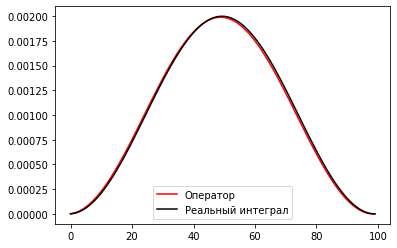

In [6]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()
plt.show()

Для минимизации функционала $L(x) = \| Ax-y \|^2 + \omega \|x\|^2$ воспользуемся градиентным спуском. Для этого зафиксируем начальное значение функционала $x_0 =
\begin{pmatrix}
  0\\
  0\\
 \vdots\\
 0\\
\end{pmatrix} $. Шаг градиентного спуска выберем равным $lr = 100$. Количество эпох пусть будет равно 10000.

In [7]:
x_0 = torch.zeros(size=(N, 1), requires_grad=True)
lr = 100
e = 10000
optimizer = torch.optim.SGD([x_0], lr)

Запустим градиентный спуск для $\omega = 10^{-8}$.

In [8]:
omega = 10e-8
for epoch in range(e):
    optimizer.zero_grad()
    loss = torch.norm(torch.matmul(A,x_0)-U_in)**2 + omega * torch.norm(x_0)**2
    loss.backward()
    optimizer.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 49.74874496459961 epoch: 0
loss: 27.310091018676758 epoch: 1000
loss: 18.3094539642334 epoch: 2000
loss: 13.294063568115234 epoch: 3000
loss: 10.341729164123535 epoch: 4000
loss: 8.505280494689941 epoch: 5000
loss: 7.303333759307861 epoch: 6000
loss: 6.482292175292969 epoch: 7000
loss: 5.90239143371582 epoch: 8000
loss: 5.482512950897217 epoch: 9000


Посмотрим на результат и сравним его с пакетной реализацией псевдообращения в библиотеке PyTorch.

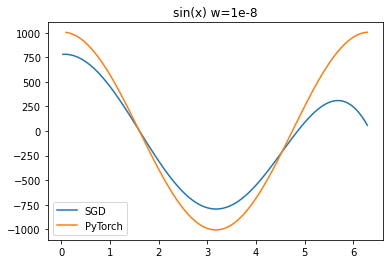

In [9]:
plt.axis()
plt.plot(x_s, x_0.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('sin(x) w=1e-8')
plt.legend()

In [10]:
x_0 = None
x_1 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-20
optimizer1 = torch.optim.SGD([x_1], 1000)
for epoch in range(10000):
    optimizer1.zero_grad()
    loss = torch.norm(torch.matmul(A,x_1)-U_in)**2 + omega * torch.norm(x_1)**2
    loss.backward()
    optimizer1.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 49.74874496459961 epoch: 0
loss: 1.927436351776123 epoch: 1000
loss: 0.37971392273902893 epoch: 2000
loss: 0.1541086733341217 epoch: 3000
loss: 0.08963143825531006 epoch: 4000
loss: 0.060832876712083817 epoch: 5000
loss: 0.044857800006866455 epoch: 6000
loss: 0.034865979105234146 epoch: 7000
loss: 0.028112612664699554 epoch: 8000
loss: 0.02329285629093647 epoch: 9000


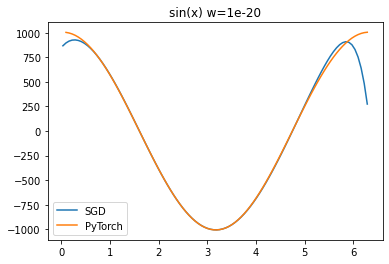

In [11]:
plt.axis()
plt.plot(x_s, x_1.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('sin(x) w=1e-20')
plt.legend()

Протестируем работу градиентного спуска на примере входного сигнала $U_{in}(t) = t, \;t \in [0, 2\pi].$

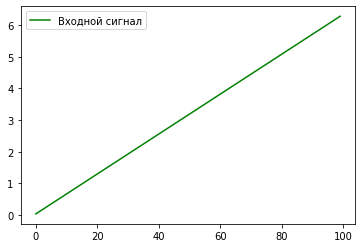

In [12]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = x_s[i]
  U_out_real[i] = x_s[i]**2/2/tau
U_out = torch.matmul(A, U_in)
plt.plot(U_in, color='green', label='Входной сигнал')
plt.legend()

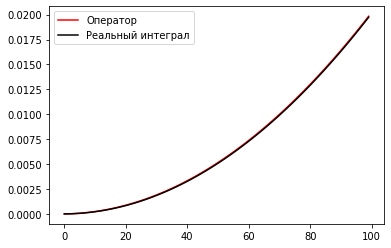

In [13]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()

In [14]:
x_0 = None
x_1 = None
x_2 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-20
optimizer3 = torch.optim.SGD([x_2], 100)

for epoch in range(10000):
    optimizer3.zero_grad()
    loss = torch.norm(torch.matmul(A,x_2)-U_in)**2 + omega * torch.norm(x_2)**2
    loss.backward()
    optimizer3.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 1329.139892578125 epoch: 0
loss: 12.838515281677246 epoch: 1000
loss: 6.093997955322266 epoch: 2000
loss: 3.6518590450286865 epoch: 3000
loss: 2.3555357456207275 epoch: 4000
loss: 1.6369214057922363 epoch: 5000
loss: 1.216267466545105 epoch: 6000
loss: 0.9538048505783081 epoch: 7000
loss: 0.7787531018257141 epoch: 8000
loss: 0.6545320153236389 epoch: 9000


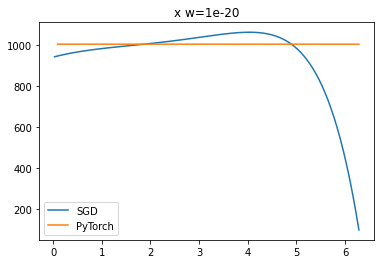

In [15]:
plt.axis()
plt.plot(x_s, x_2.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('x w=1e-20')
plt.legend()

Протестируем работу градиентного спуска на примере входного сигнала $U_{in}(t) = e^t, \;t \in [0, 2\pi].$

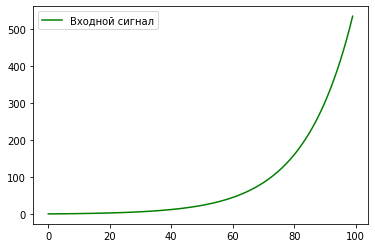

In [16]:
U_in = torch.zeros(size=(N, 1), requires_grad=False)
U_out_real = torch.zeros(size=(N, 1), requires_grad=False)
for i in range(N):
  U_in[i] = torch.exp(x_s[i])
  U_out_real[i] = torch.exp(x_s[i])/tau
U_out = torch.matmul(A, U_in)
plt.plot(U_in, color='green', label='Входной сигнал')
plt.legend()

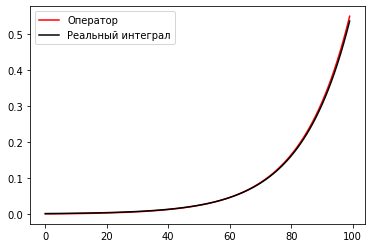

In [17]:
plt.plot(U_out, color='red', label='Оператор')
plt.plot(U_out_real, color='black', label='Реальный интеграл')
plt.legend()

In [18]:
x_0 = None
x_1 = None
x_2 = None
x_3 = torch.zeros(size=(N, 1), requires_grad=True)

omega = 10e-20
optimizer4 = torch.optim.SGD([x_3], 100)

for epoch in range(10000):
    optimizer4.zero_grad()
    loss = torch.norm(torch.matmul(A,x_3)-U_in)**2 + omega * torch.norm(x_3)**2
    loss.backward()
    optimizer4.step()
    if epoch%1000 == 0:
       print("loss: {} epoch: {}".format(loss.detach().numpy(), epoch))

loss: 2416813.25 epoch: 0
loss: 669851.0 epoch: 1000
loss: 452818.34375 epoch: 2000
loss: 329873.40625 epoch: 3000
loss: 255140.59375 epoch: 4000
loss: 206574.609375 epoch: 5000
loss: 172888.203125 epoch: 6000
loss: 148153.953125 epoch: 7000
loss: 129147.6953125 epoch: 8000
loss: 114034.0859375 epoch: 9000


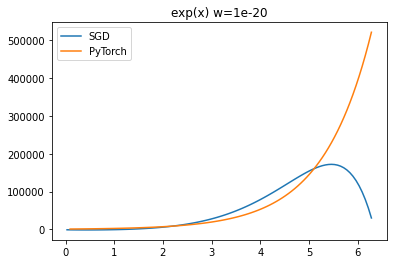

In [19]:
plt.axis()
plt.plot(x_s, x_3.detach(), label='SGD')
plt.plot(x_s[1:], torch.matmul(torch.linalg.pinv(A), U_in)[1:], label='PyTorch')
plt.title('exp(x) w=1e-20')
plt.legend()